In [10]:
#%pip install -U git+https://github.com/UN-GCPDS/python-gcpds.MI_prediction.git &> /dev/null
%pip install -e git+https://github.com/UN-GCPDS/python-gcpds.MI_prediction.git#egg=MI_prediction

Obtaining MI_prediction from git+https://github.com/UN-GCPDS/python-gcpds.MI_prediction.git#egg=MI_prediction
  Updating ./src/mi-prediction clone
  Running command git fetch -q --tags
  Running command git reset --hard -q 375bca5fb027b86f01ad50ab5d14d0c64acad13a
  Preparing metadata (setup.py) ... done
  Attempting uninstall: MI_prediction
    Found existing installation: MI-prediction 0.1
    Uninstalling MI-prediction-0.1:
      Successfully uninstalled MI-prediction-0.1
  Running setup.py develop for MI_prediction
Note: you may need to restart the kernel to use updated packages.


In [1]:
from MI_prediction.Utils.Datasets import DataLoader, DataLoader_Rest, get_epochs, get_runs
from MI_prediction.Datasets import Cho2017_Rest
from braindecode.preprocessing.preprocess import exponential_moving_standardize, preprocess, Preprocessor, scale
import numpy as np

# BCI IIa

In [108]:
dl = DataLoader(dataset_name="BNCI2014001")

In [109]:
dl.load_data()# Download all dataset

100%|█████████████████████████████████████| 44.1M/44.1M [00:00<00:00, 20.2GB/s]
SHA256 hash of downloaded file: 7e731ee8b681d5da6ecb11ae1d4e64b1653c7f15aad5d6b7620b25ce53141e80
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|█████████████████████████████████████| 42.3M/42.3M [00:00<00:00, 19.9GB/s]
SHA256 hash of downloaded file: d4229267ec7624fa8bd3af5cbebac17f415f7c722de6cb676748f8cb3b717d97
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|█████████████████████████████████████| 37.2M/37.2M [00:00<00:00, 15.3GB/s]
SHA256 hash of downloaded file: 15850d81b95fc88cc8b9589eb9b713d49fa071e28adaf32d675b3eaa30591d6e
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|████████████████████████████████

48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
4

In [110]:
dl.load_data(subject_ids=[9])

48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]


In [15]:
low_cut_hz = 4.
high_cut_hz = 38.

preprocessors = [
            Preprocessor('pick_types', eeg=True, meg=False, stim=False),  # Keep EEG sensors
            Preprocessor(scale, factor=1e6, apply_on_array=True),  # Convert from V to uV
            Preprocessor('filter', l_freq=low_cut_hz, h_freq=high_cut_hz),  # Bandpass filter
        ]

dl.preprocess_data(preprocessors=preprocessors)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 sec)



/Users/julian/miniforge3/envs/MI_pred/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function scale is deprecated; will be removed in 0.7.0. Use numpy.multiply instead.
  warnings.warn(msg, category=FutureWarning)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 

In [16]:
trials = dl.get_trials(start_offset=[0,0.5], end_offset=[0,0.5])

Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Adding metadata with 4 columns
48 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 48 events and 1000 original time points ...
0 bad epochs dropped
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Adding metadata with 4 columns
48 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 48 events and 1000 original time points ...
0 bad epochs dropped
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Adding metadata with 4 columns
48 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 48 events and 1000 original time points ...
0 bad epochs dropped
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Adding metadata with 4 columns
48 matching even

In [22]:
X,y = get_epochs(trials['win_0'].split('session')['session_E'])

In [23]:
X.shape

(288, 22, 1000)

# GIGAScience Cho2017

In [3]:
dl = DataLoader(dataset_name="Cho2017")

In [4]:
dl.load_data()# Download all dataset

Trials demeaned and stacked with zero buffer to create continuous data -- edge effects present
Trials demeaned and stacked with zero buffer to create continuous data -- edge effects present
Trials demeaned and stacked with zero buffer to create continuous data -- edge effects present
Trials demeaned and stacked with zero buffer to create continuous data -- edge effects present
Trials demeaned and stacked with zero buffer to create continuous data -- edge effects present
Trials demeaned and stacked with zero buffer to create continuous data -- edge effects present
Trials demeaned and stacked with zero buffer to create continuous data -- edge effects present
Trials demeaned and stacked with zero buffer to create continuous data -- edge effects present
Trials demeaned and stacked with zero buffer to create continuous data -- edge effects present
Trials demeaned and stacked with zero buffer to create continuous data -- edge effects present
Trials demeaned and stacked with zero buffer to cr

200 events found
Event IDs: [1 2]
200 events found
Event IDs: [1 2]
200 events found
Event IDs: [1 2]
200 events found
Event IDs: [1 2]
200 events found
Event IDs: [1 2]
200 events found
Event IDs: [1 2]
240 events found
Event IDs: [1 2]
200 events found
Event IDs: [1 2]
240 events found
Event IDs: [1 2]
200 events found
Event IDs: [1 2]
200 events found
Event IDs: [1 2]
200 events found
Event IDs: [1 2]
200 events found
Event IDs: [1 2]
200 events found
Event IDs: [1 2]
200 events found
Event IDs: [1 2]
200 events found
Event IDs: [1 2]
200 events found
Event IDs: [1 2]
200 events found
Event IDs: [1 2]
200 events found
Event IDs: [1 2]
200 events found
Event IDs: [1 2]
200 events found
Event IDs: [1 2]
200 events found
Event IDs: [1 2]
200 events found
Event IDs: [1 2]
200 events found
Event IDs: [1 2]
200 events found
Event IDs: [1 2]
200 events found
Event IDs: [1 2]
200 events found
Event IDs: [1 2]
200 events found
Event IDs: [1 2]
200 events found
Event IDs: [1 2]
200 events fou

In [5]:
dl.load_data(subject_ids=[1])

Trials demeaned and stacked with zero buffer to create continuous data -- edge effects present


200 events found
Event IDs: [1 2]


In [14]:
dl.dataset.datasets[0]

In [4]:
low_cut_hz = 4.
high_cut_hz = 38.

preprocessors = [
            Preprocessor('pick_types', eeg=True, meg=False, stim=False),  # Keep EEG sensors
            Preprocessor(scale, factor=1e6, apply_on_array=True),  # Convert from V to uV
            Preprocessor('filter', l_freq=low_cut_hz, h_freq=high_cut_hz),  # Bandpass filter
        ]

dl.preprocess_data(preprocessors=preprocessors)

/Users/julian/miniforge3/envs/MI_pred/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function scale is deprecated; will be removed in 0.7.0. Use numpy.multiply instead.
  warnings.warn(msg, category=FutureWarning)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 845 samples (1.650 sec)



In [5]:
trials = dl.get_trials(start_offset=[0,0.5], end_offset=[0,0.5])

Used Annotations descriptions: ['left_hand', 'right_hand']
Adding metadata with 4 columns
200 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 200 events and 1536 original time points ...
0 bad epochs dropped
Used Annotations descriptions: ['left_hand', 'right_hand']
Adding metadata with 4 columns
200 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 200 events and 1536 original time points ...
0 bad epochs dropped


In [6]:
X,y = get_epochs(trials['win_0'].split('session')['session_0'])

In [7]:
Xtr,ytr = get_runs(trials['win_0'].split('session')['session_0'], n_trials=20)

In [8]:
Xtr.keys()

dict_keys(['run_0', 'run_1', 'run_2', 'run_3', 'run_4'])

# GOGAScience Cho2017 Resting state

In [2]:
dl = DataLoader_Rest(dataset_name=Cho2017_Rest())

In [3]:
dl.load_data(subject_ids=[1])

In [4]:
low_cut_hz = 4.
high_cut_hz = 38.

preprocessors = [
            Preprocessor('pick_types', eeg=True, meg=False, stim=False),  # Keep EEG sensors
            Preprocessor(scale, factor=1e6, apply_on_array=True),  # Convert from V to uV
            Preprocessor('filter', l_freq=low_cut_hz, h_freq=high_cut_hz),  # Bandpass filter
        ]

dl.preprocess_data(preprocessors=preprocessors)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 845 samples (1.650 sec)



/Users/julian/miniforge3/envs/MI_pred/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function scale is deprecated; will be removed in 0.7.0. Use numpy.multiply instead.
  warnings.warn(msg, category=FutureWarning)


In [5]:
trials = dl.get_trials(start_offset=[0], end_offset=[0])

Adding metadata with 4 columns
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 33792 original time points ...
0 bad epochs dropped


In [17]:
X,y = get_epochs(trials['win_0'],labels=False)

In [19]:
X.shape

(1, 64, 33792)

In [20]:
import matplotlib.pyplot as plt

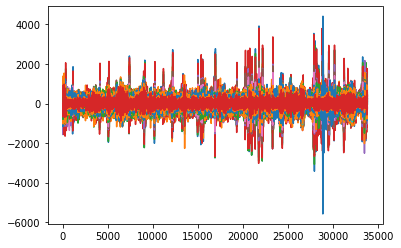

In [21]:
plt.plot(X[0,:,:].T)
plt.show()